# **Import Library**

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import (
    accuracy_score, f1_score, mean_squared_error, mean_absolute_error,
    confusion_matrix, classification_report, plot_roc_curve
)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# **Loading Data**

In [3]:
path= 'C:/Users/chophan/Downloads/loan.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cols = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
        'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']

In [6]:
df = df[cols]
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,...,Apr-2001,9.0,1.0,4341,10.3,34.0,w,Individual,0.0,1.0
1,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,...,Jun-1987,13.0,1.0,12315,24.2,44.0,w,Individual,3.0,1.0
2,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,...,Apr-2011,8.0,0.0,4599,19.1,13.0,w,Individual,2.0,0.0
3,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,...,Feb-2006,10.0,0.0,5468,78.1,13.0,w,Individual,3.0,0.0
4,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,...,Dec-2000,12.0,0.0,829,3.6,26.0,w,Individual,2.0,0.0


# **EDA**

In [9]:
df.isna().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title               166969
emp_length              146907
home_ownership               0
annual_inc                   4
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    23325
zip_code                     1
addr_state                   0
dti                       1711
earliest_cr_line            29
open_acc                    29
pub_rec                     29
revol_bal                    0
revol_util                1802
total_acc                   29
initial_list_status          0
application_type             0
mort_acc                 50030
pub_rec_bankruptcies      1365
dtype: int64

### loan_amnt: The amount of the loan the applicant received.
### term: The number of months of the loan the applicant received.
### int_rate: Interest rate of the loan the applicant received.
### grade: Grade associated with the loan.
### sub_grade: Detailed grade associated with the loan.

In [10]:
df.isna().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               7.385826
emp_length              6.498389
home_ownership          0.000000
annual_inc              0.000177
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   1.031775
zip_code                0.000044
addr_state              0.000000
dti                     0.075686
earliest_cr_line        0.001283
open_acc                0.001283
pub_rec                 0.001283
revol_bal               0.000000
revol_util              0.079711
total_acc               0.001283
initial_list_status     0.000000
application_type        0.000000
mort_acc                2.213063
pub_rec_bankruptcies    0.060380
dtype: float64

In [11]:
df.shape

(2260668, 28)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 28 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             int64  
 1   term                  object 
 2   int_rate              float64
 3   installment           float64
 4   grade                 object 
 5   sub_grade             object 
 6   emp_title             object 
 7   emp_length            object 
 8   home_ownership        object 
 9   annual_inc            float64
 10  verification_status   object 
 11  issue_d               object 
 12  loan_status           object 
 13  purpose               object 
 14  title                 object 
 15  zip_code              object 
 16  addr_state            object 
 17  dti                   float64
 18  earliest_cr_line      object 
 19  open_acc              float64
 20  pub_rec               float64
 21  revol_bal             int64  
 22  revol_util            float64
 23  total_a

In [13]:
df['loan_amnt'].value_counts()

10000    187236
20000    131006
15000    123226
12000    121681
35000     86285
          ...  
750           1
725           1
925           1
550           1
850           1
Name: loan_amnt, Length: 1572, dtype: int64

**Loan Amount** <span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);">&nbsp;-&nbsp;</span> _The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value._

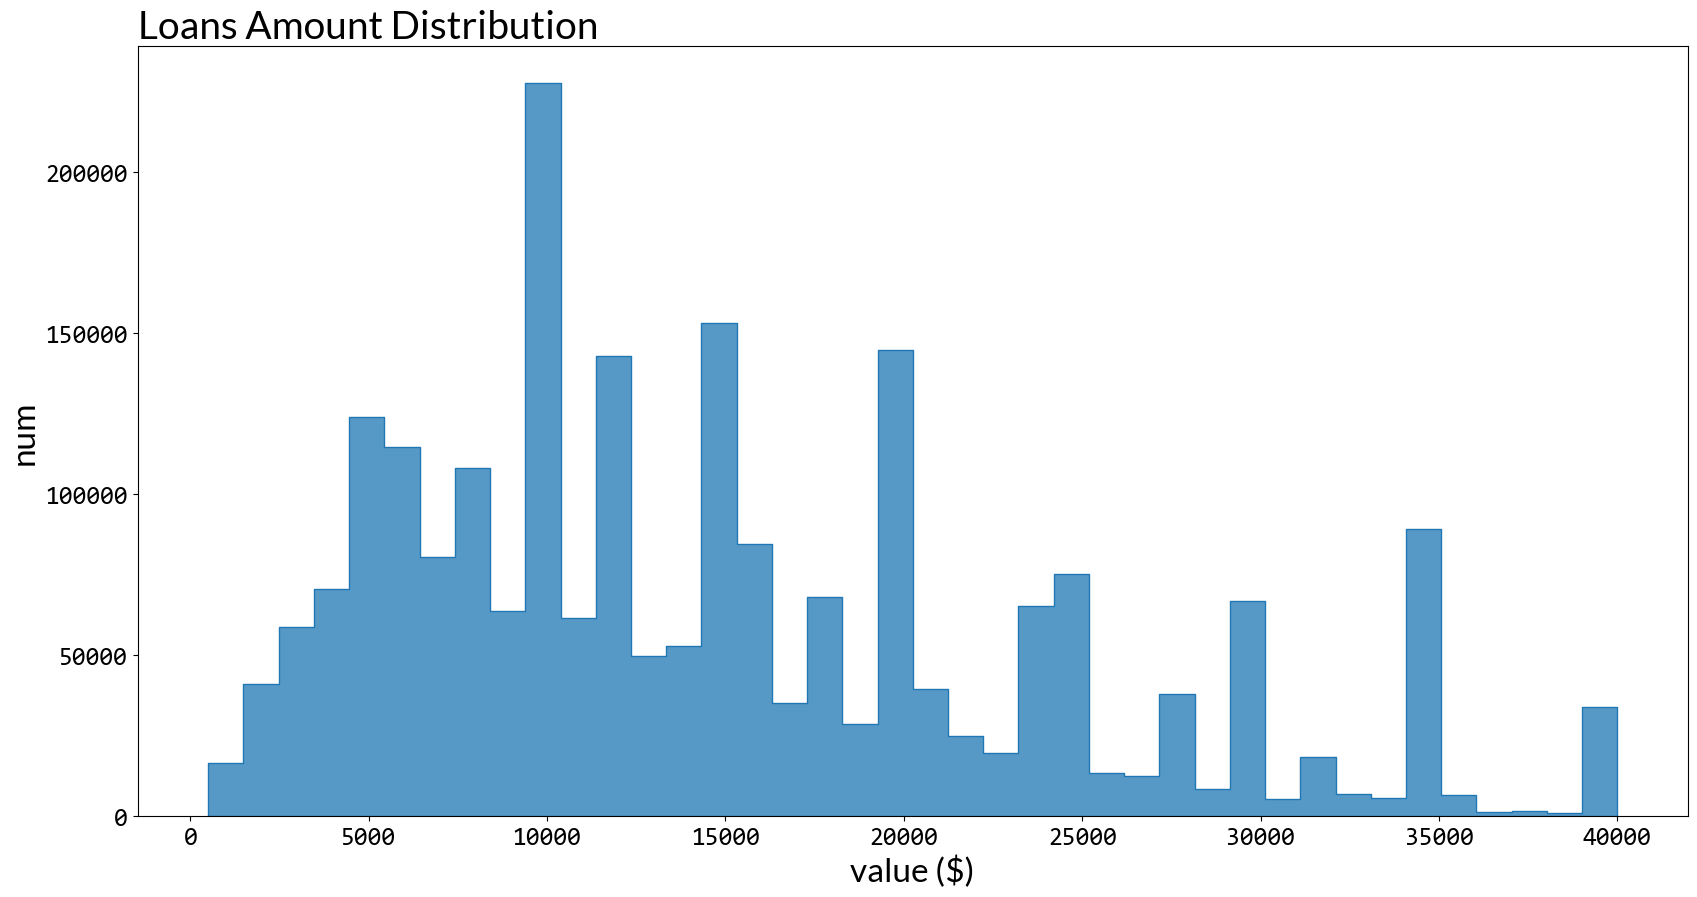

In [14]:
plt.figure(figsize=(20,10))

ax = sns.histplot(df,
                  x='loan_amnt',
                  kde=False,
                  bins=40,
                  element='step')

ax.set_title('Loans Amount Distribution', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('value ($)', fontname='Lato', fontsize=24)
ax.set_ylabel('num', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Consolas', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)

plt.show()

**int\_rate** <span style="--z-index-notebook-progress-bar: 5; --z-index-notebook-list-insertion-indicator: 10; --z-index-notebook-cell-editor-outline: 20; --z-index-notebook-scrollbar: 25; --z-index-notebook-cell-status: 26; --z-index-notebook-cell-drag-handle: 26; --z-index-notebook-folding-indicator: 26; --z-index-notebook-output: 27; --z-index-notebook-cell-bottom-toolbar-container: 28; --z-index-notebook-run-button-container: 29; --z-index-notebook-input-collapse-condicon: 29; --z-index-notebook-cell-output-toolbar: 30; --z-index-notebook-cell-toolbar: 36; color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);">-&nbsp;</span> _Interest Rate on the loan_

In [15]:
df['int_rate'].value_counts()

11.99    53869
5.32     47171
10.99    44165
13.99    43026
11.49    32009
         ...  
17.50        1
24.59        1
17.46        1
17.44        1
14.28        1
Name: int_rate, Length: 673, dtype: int64

### Defalt: Vỡ nợ, là việc không trả được nợ bao gồm cả lãi hoặc gốc của một khoản vay hay chứng khoán.  
### Charged Off: Khoanh nợ, là khoản nợ mà chủ nợ không có khả năng thu lại được do người vay không thể trả sau khoản thời gian dài.
### Fully Paid: Đã trả nợ, đã trả xong toàn bộ.

In [11]:
df['loan_status'].value_counts()

Fully Paid     1041952
Current         919695
Charged Off     261655
other            37335
Default             31
Name: loan_status, dtype: int64

In [10]:
df['loan_status'] = df['loan_status'].replace(['Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 
                            'Does not meet the credit policy. Status:Charged Off'], 'other')

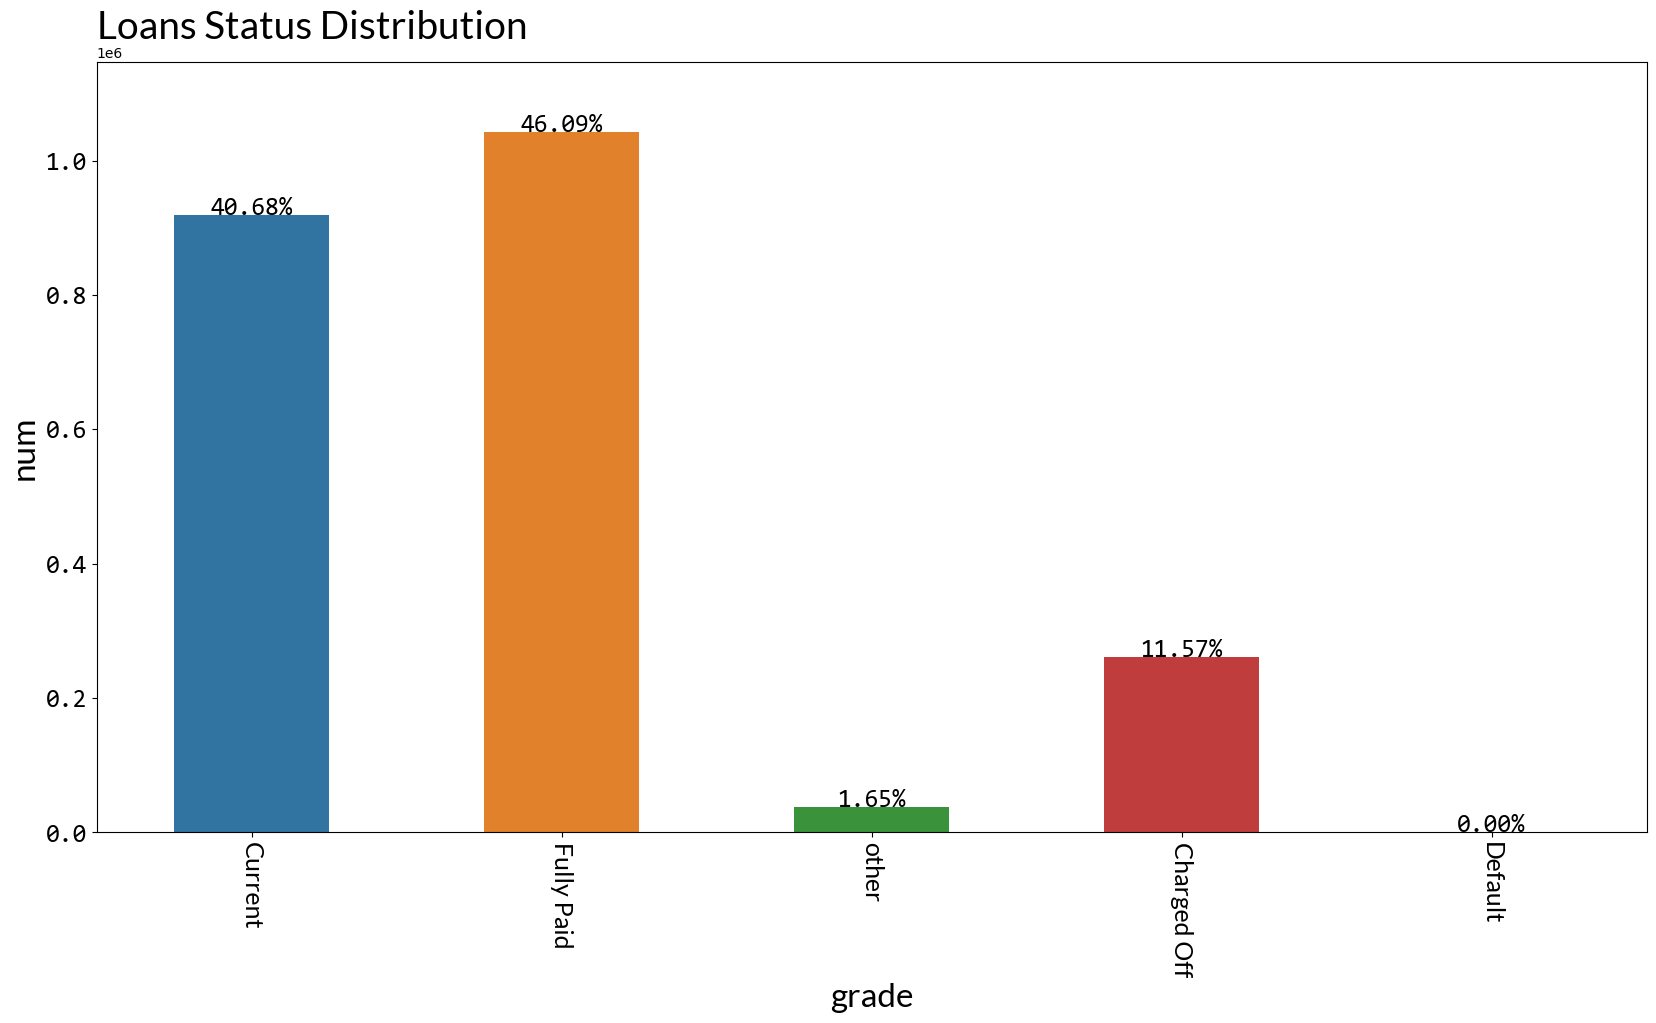

In [18]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=270)

ax = sns.countplot(df,
                   x='loan_status',
                   width=0.5)
ax.set_title('Loans Status Distribution', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('grade', fontname='Lato', fontsize=24)
ax.set_ylabel('num', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Lato', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)

total=len(df)

sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=18, fontname='Consolas') 
ax.set_ylim(0, max(sizes) * 1.10)

#plt.savefig('loan_status.png')
plt.show()

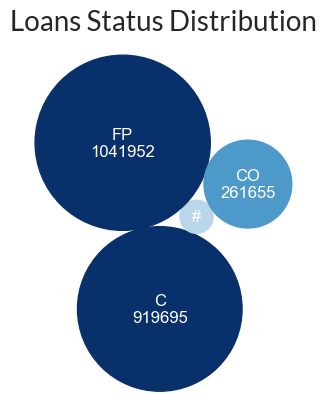

In [18]:
top_states_highest_orders = {
    'state': ['C\n919695', '#', 'FP\n1041952', 'CO\n261655'],
    'num_of_orders': [919695, 37335, 1041952, 261655],
    'color': ['#08306b', '#b9d6eb', '#08306b', '#4d99ca']
}

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

bubble_chart = BubbleChart(area=top_states_highest_orders['num_of_orders'],
                           bubble_spacing=2.5)

#important
sns.set()
bubble_chart.collapse()
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

plt.rcParams['text.color'] = 'white'
bubble_chart.plot(ax, top_states_highest_orders['state'], top_states_highest_orders['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Loans Status Distribution', fontname='Lato', fontsize=20)

plt.savefig('top_state_distinct_orders.png')
plt.show()

In [12]:
df_geo = df.groupby(['addr_state'], as_index=False).size()
df_geo.head()

,addr_state,size
0,AK,5231
1,AL,27284
2,AR,17074
3,AZ,53777
4,CA,314533


In [14]:
fig = px.choropleth(df_geo,
                    locations='addr_state',
                    color='size',
                    color_continuous_scale='Blues',
                    title='Loans Offered by State',
                    hover_name='addr_state',
                    hover_data={'size' : True,
                                'addr_state' : False},
                    scope='usa',
                    locationmode='USA-states',
                    labels={'size':''},
                    width=2000,
                    height=1000)

fig.update_layout(showlegend=False,
                  geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='#e0fffe'),
                  font={'color' : '#111111'},
                  font_family='Lato',
                  font_size=20,
                  title_font_family='Lato',
                  title_font_size=28)
plt.savefig('map.png')
fig.show()

<Figure size 640x480 with 0 Axes>

In [8]:
df_ls = df.groupby(['loan_status'], as_index=False).size()
df_ls

,loan_status,size
0,Charged Off,261655
1,Current,919695
2,Default,31
3,Does not meet the credit policy. Status:Charge...,761
4,Does not meet the credit policy. Status:Fully ...,1988
5,Fully Paid,1041952
6,In Grace Period,8952
7,Late (16-30 days),3737
8,Late (31-120 days),21897


In [19]:
df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [20]:
df_vf = df.groupby(['verification_status'], as_index=False).size()
df_vf

,verification_status,size
0,Not Verified,392205
1,Source Verified,503726
2,Verified,407676


In [21]:
df = df[df['verification_status'].isin(['Source Verified', 'Verified'])]

# **Data Preprocessing**

## convert object to lower()

In [22]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

In [23]:
df = df.applymap(lambda x: x.lower() if type(x) == str else x)

## loan_status

In [24]:
df_ls = df.groupby(['loan_status'], as_index=False).size()
df_ls

,loan_status,size
0,charged off,203957
1,fully paid,707445


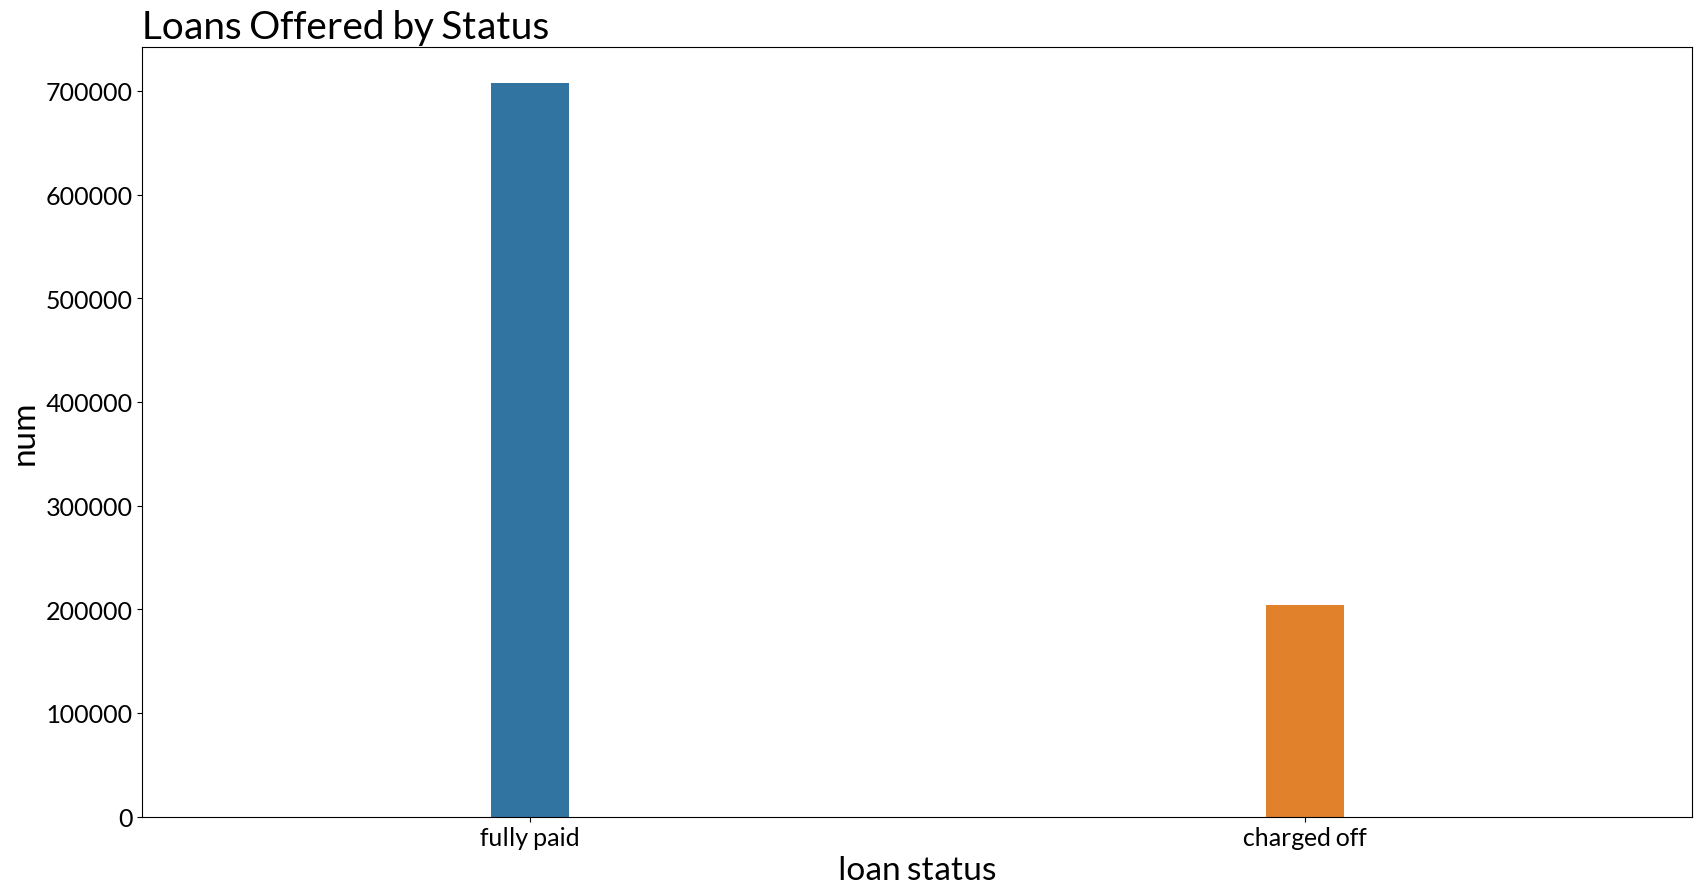

In [28]:
plt.figure(figsize=(20,10))

ax = sns.countplot(df,
                   x='loan_status',
                   width=0.1)
ax.set_title('Loans Offered by Status', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('loan status', fontname='Lato', fontsize=24)
ax.set_ylabel('num', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Lato', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Lato', fontsize=18)


plt.show()

## term

In [25]:
df['term'].value_counts()

 36 months    658494
 60 months    252908
Name: term, dtype: int64

In [26]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

## grade
### We know that grade is just a sub feature of sub_grade, So we are goinig to drop it.

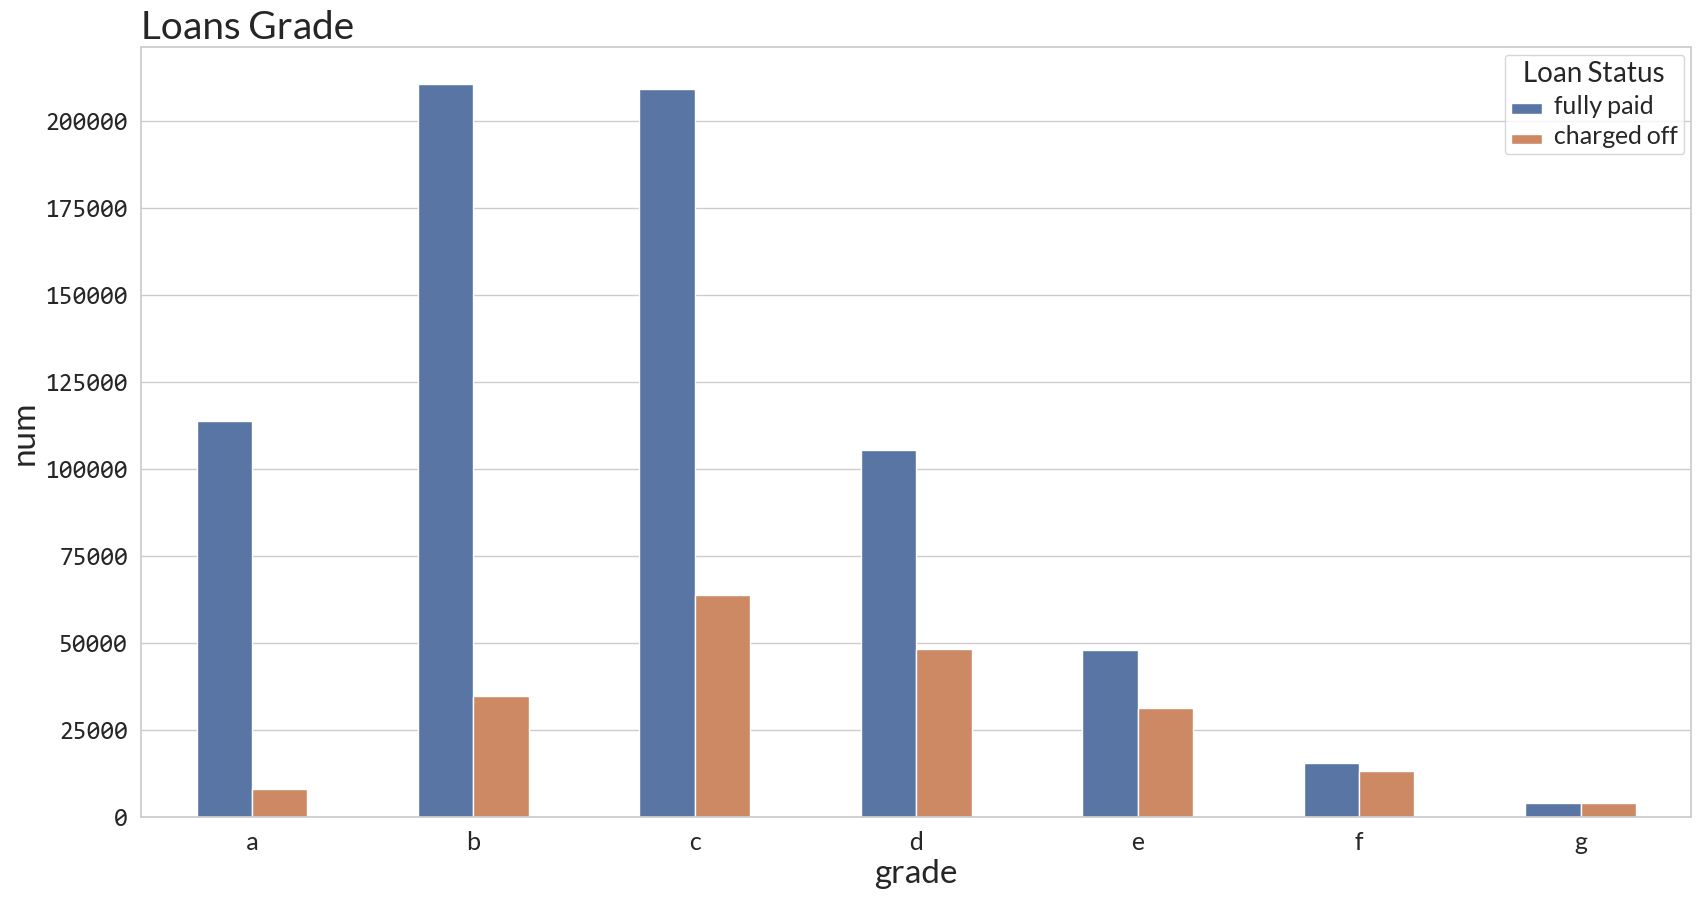

In [28]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
ax = sns.countplot(df,
                   x='grade',
                   hue='loan_status',
                   order=['a', 'b', 'c', 'd', 'e', 'f', 'g'],
                   width=0.5)
ax.set_title('Loans Grade', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('grade', fontname='Lato', fontsize=24)
ax.set_ylabel('num', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Lato', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)

ax.legend(title='Loan Status')
plt.setp(ax.get_legend().get_texts(), fontname='Lato', fontsize=18)
plt.setp(ax.get_legend().get_title(), fontname='Lato', fontsize=20)

#plt.savefig('loan_status.png')
plt.show()

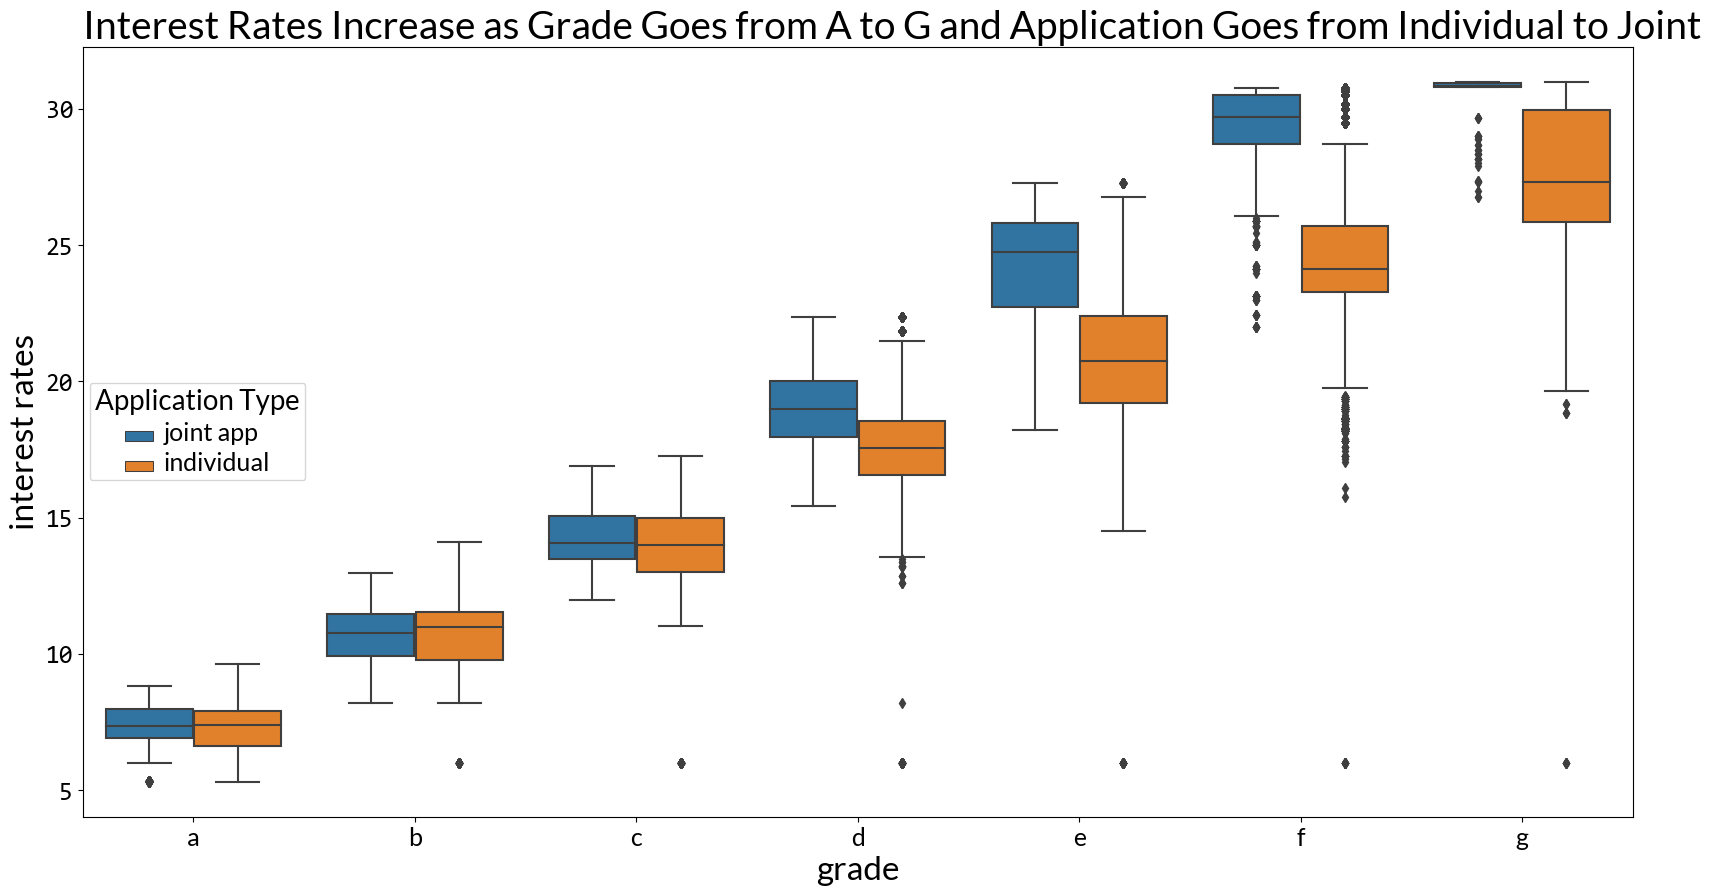

In [32]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(df,
                 x='grade',
                 y='int_rate',
                 hue='application_type',
                 order=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
ax.set_title('Interest Rates Increase as Grade Goes from A to G and Application Goes from Individual to Joint', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('grade', fontname='Lato', fontsize=24)
ax.set_ylabel('interest rates', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Lato', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)

ax.legend(title='Application Type', loc='center left')
plt.setp(ax.get_legend().get_texts(), fontname='Lato', fontsize=18)
plt.setp(ax.get_legend().get_title(), fontname='Lato', fontsize=20)

#plt.savefig('int_rate.png')
plt.show()

In [17]:
df.drop('grade', axis=1, inplace=True)

## emp_title
### Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [18]:
df['emp_title'].value_counts()

manager                                 16616
teacher                                 16532
owner                                   11199
registered nurse                         7833
driver                                   7531
                                        ...  
drip truck                                  1
early head start director                   1
personnel and communications liaison        1
fuel coordinator                            1
onsite operations manager                   1
Name: emp_title, Length: 234726, dtype: int64

In [19]:
df.drop('emp_title', axis=1, inplace=True)

## emp_length

In [20]:
df['emp_length'].value_counts()

10+ years    300170
2 years       79977
< 1 year      74451
3 years       70869
1 year        59973
5 years       55728
4 years       53157
6 years       41400
8 years       40926
7 years       39953
9 years       34128
Name: emp_length, dtype: int64

In [21]:
for year in df.emp_length.unique():
    print(f'{year} years in this position:')
    print(f'{df[df.emp_length == year].loan_status.value_counts(normalize=True)}')
    print('...')

5 years years in this position:
fully paid     0.776809
charged off    0.223191
Name: loan_status, dtype: float64
...
< 1 year years in this position:
fully paid     0.772642
charged off    0.227358
Name: loan_status, dtype: float64
...
3 years years in this position:


fully paid     0.772072
charged off    0.227928
Name: loan_status, dtype: float64
...
10+ years years in this position:


fully paid     0.789646
charged off    0.210354
Name: loan_status, dtype: float64
...
1 year years in this position:
fully paid     0.77103
charged off    0.22897
Name: loan_status, dtype: float64
...
8 years years in this position:


fully paid     0.776304
charged off    0.223696
Name: loan_status, dtype: float64
...
nan years in this position:
Series([], Name: loan_status, dtype: float64)
...
4 years years in this position:


fully paid     0.776361
charged off    0.223639
Name: loan_status, dtype: float64
...
2 years years in this position:
fully paid     0.775686
charged off    0.224314
Name: loan_status, dtype: float64
...
6 years years in this position:


fully paid     0.781135
charged off    0.218865
Name: loan_status, dtype: float64
...
7 years years in this position:
fully paid     0.782269
charged off    0.217731
Name: loan_status, dtype: float64
...
9 years years in this position:


fully paid     0.774584
charged off    0.225416
Name: loan_status, dtype: float64
...


### Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [22]:
df.drop('emp_length', axis=1, inplace=True)

## home_ownership

In [23]:
df['home_ownership'].value_counts()

mortgage    447203
rent        365837
own          98089
any            171
other           72
none            30
Name: home_ownership, dtype: int64

In [24]:
df['home_ownership'] = df['home_ownership'].replace(['any', 'none'], 'other')

## verification_status

In [25]:
df['verification_status'].value_counts()

source verified    503726
verified           407676
Name: verification_status, dtype: int64

## issue_d
### This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [26]:
df.drop('issue_d', axis=1, inplace=True)

## loan_status

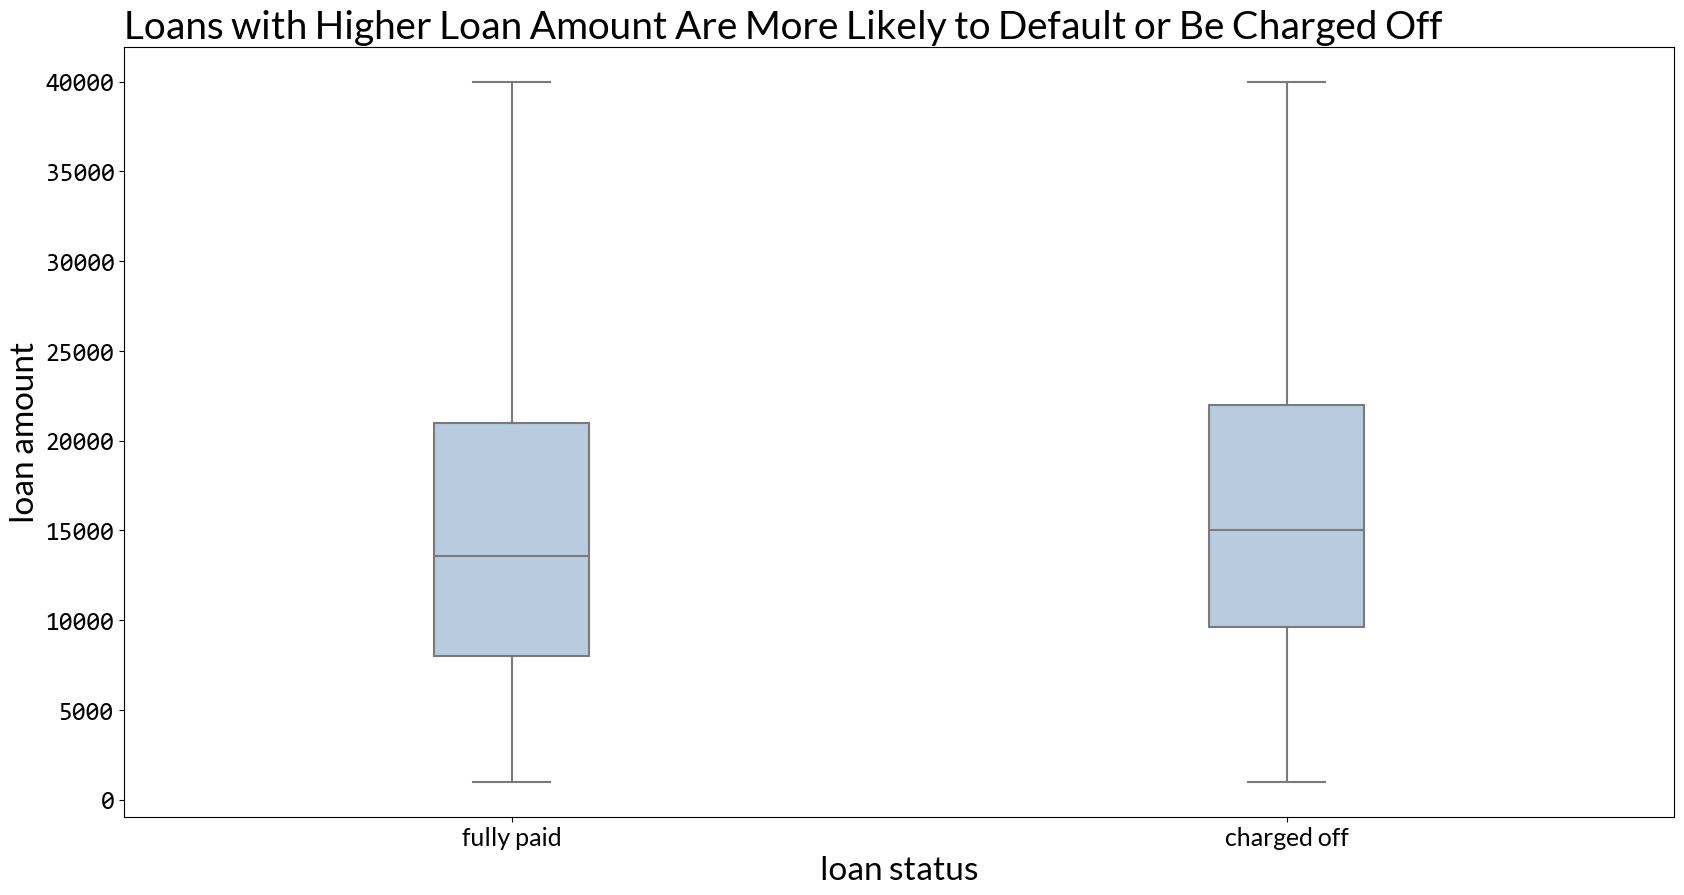

In [43]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(df,
                 x='loan_status',
                 y='loan_amnt',
                 flierprops={"marker": "x"}, color='#b2cbe5', width=0.2)

ax.set_title('Loans with Higher Loan Amount Are More Likely to Default or Be Charged Off', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('loan status', fontname='Lato', fontsize=24)
ax.set_ylabel('loan amount', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Lato', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)

plt.savefig('loan_amount_status.png')
plt.show()

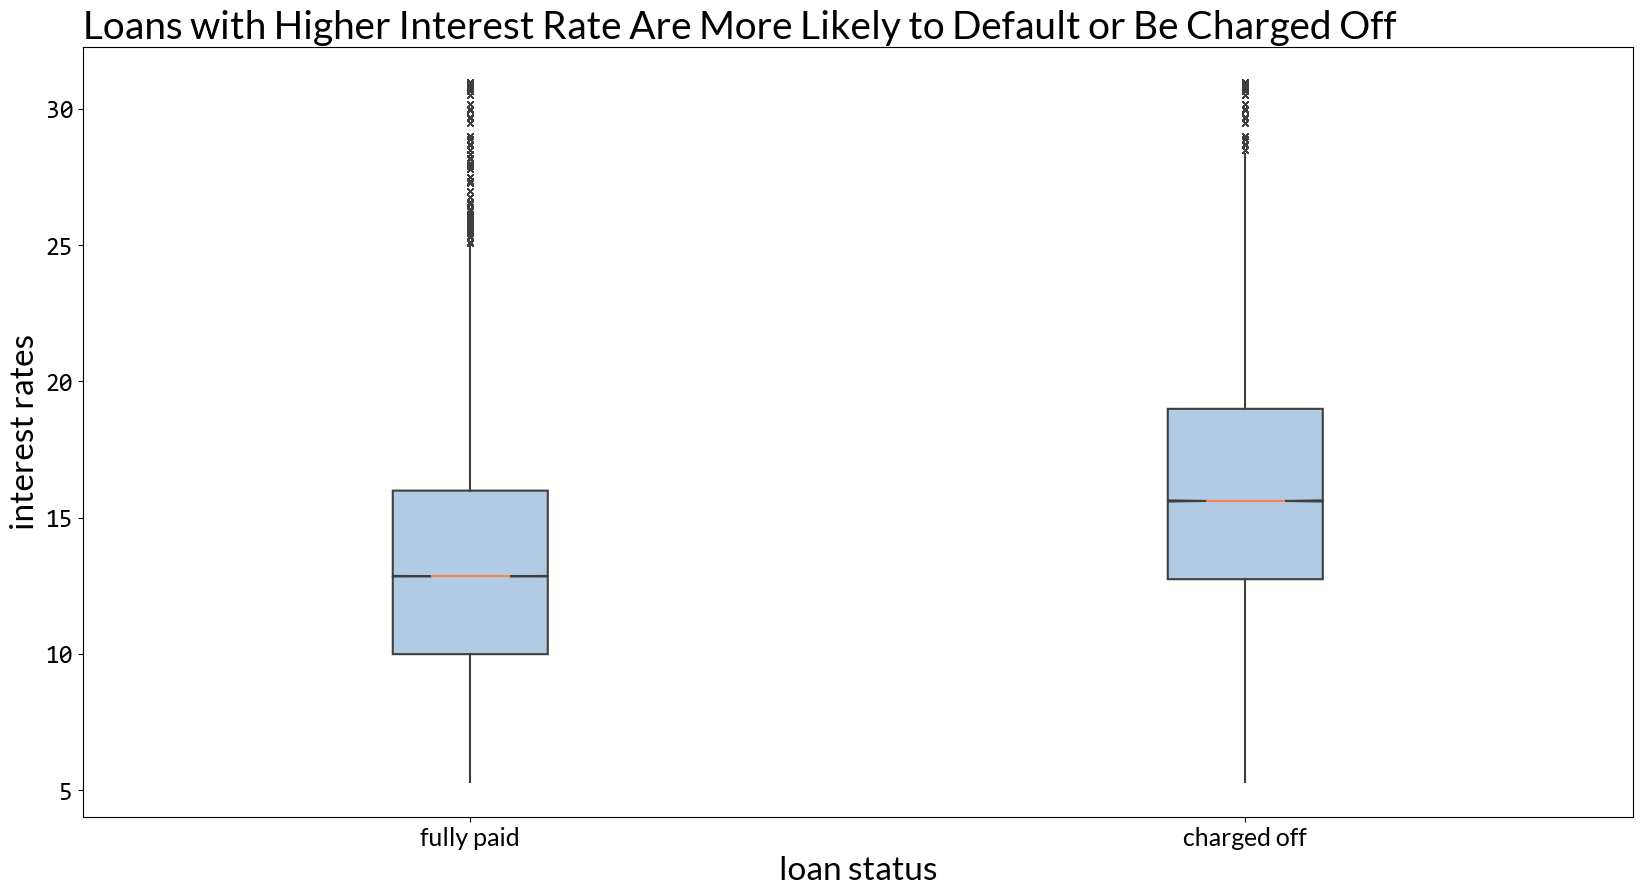

In [44]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(df,
                 x='loan_status',
                 y='int_rate',
                 notch=True,
                 showcaps=False,
                 flierprops={"marker": "x"},
                 boxprops={"facecolor": (.4, .6, .8, .5)},
                 medianprops={"color": "coral"}, width=0.2)

ax.set_title('Loans with Higher Interest Rate Are More Likely to Default or Be Charged Off', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('loan status', fontname='Lato', fontsize=24)
ax.set_ylabel('interest rates', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Lato', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)

plt.show()

In [27]:
df['loan_repaid'] = df['loan_status'].map({'fully paid':1, 'charged off':0})
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
100,1,fully paid
152,1,fully paid
215,1,fully paid
369,1,fully paid
402,1,fully paid
...,...,...
2260641,1,fully paid
2260646,1,fully paid
2260655,0,charged off
2260656,1,fully paid


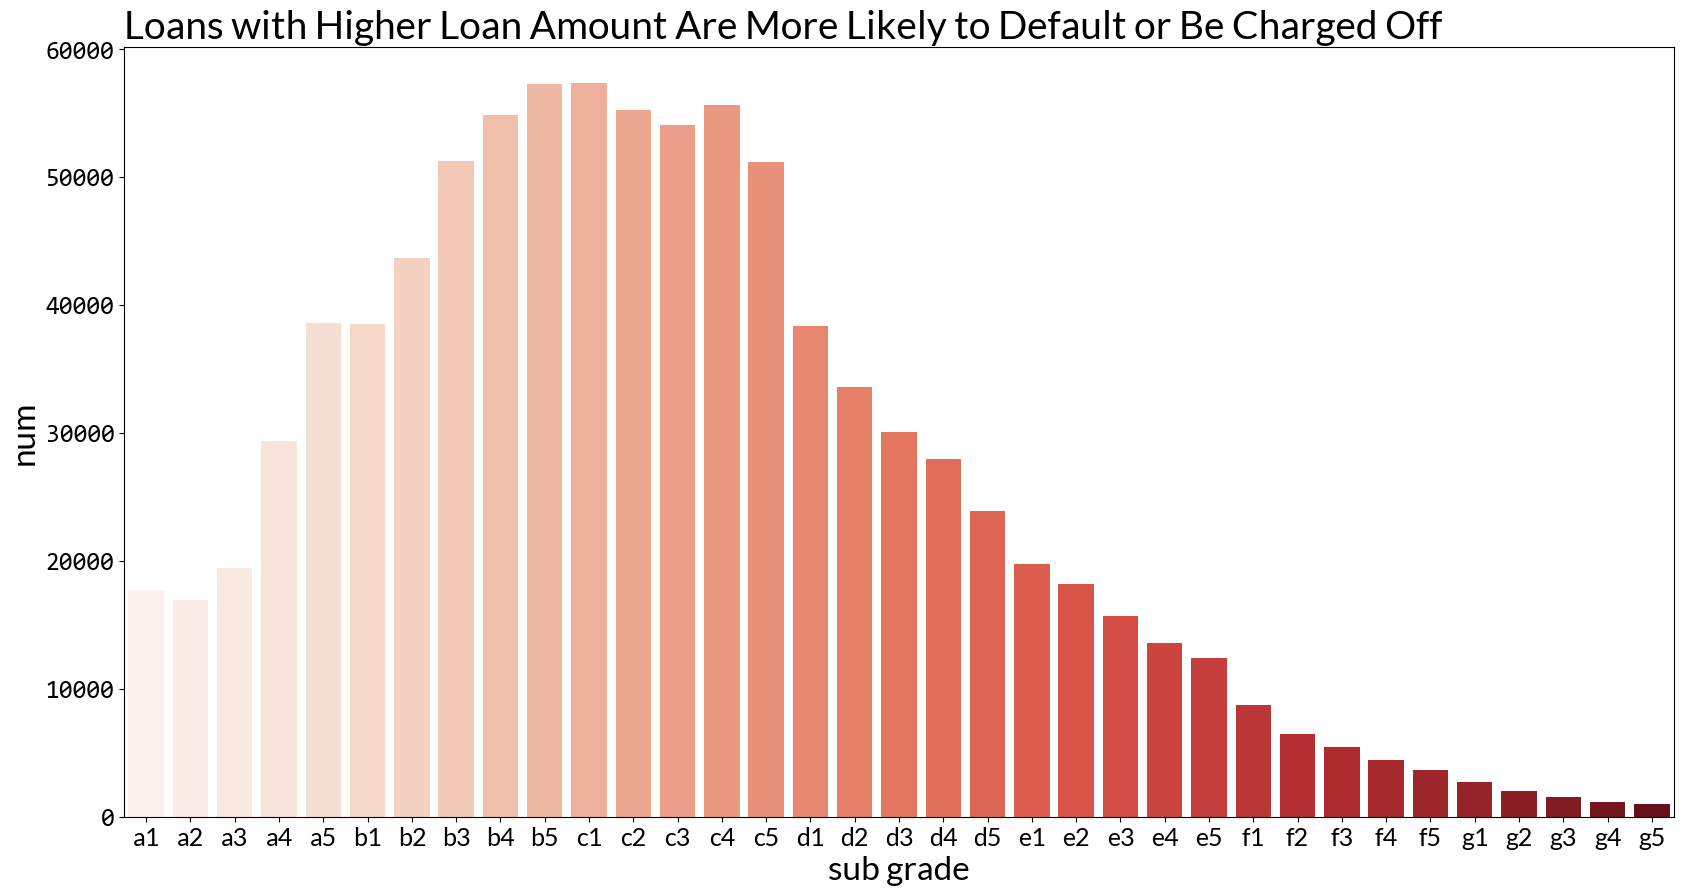

In [46]:
plt.figure(figsize=(20,10))

sub_g_order = sorted(df['sub_grade'].unique())

ax = sns.countplot(df,
                   x='sub_grade',
                   order=sub_g_order, palette='Reds')
                   
ax.set_title('Loans with Higher Loan Amount Are More Likely to Default or Be Charged Off', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('sub grade', fontname='Lato', fontsize=24)
ax.set_ylabel('num', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Lato', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)



plt.show()

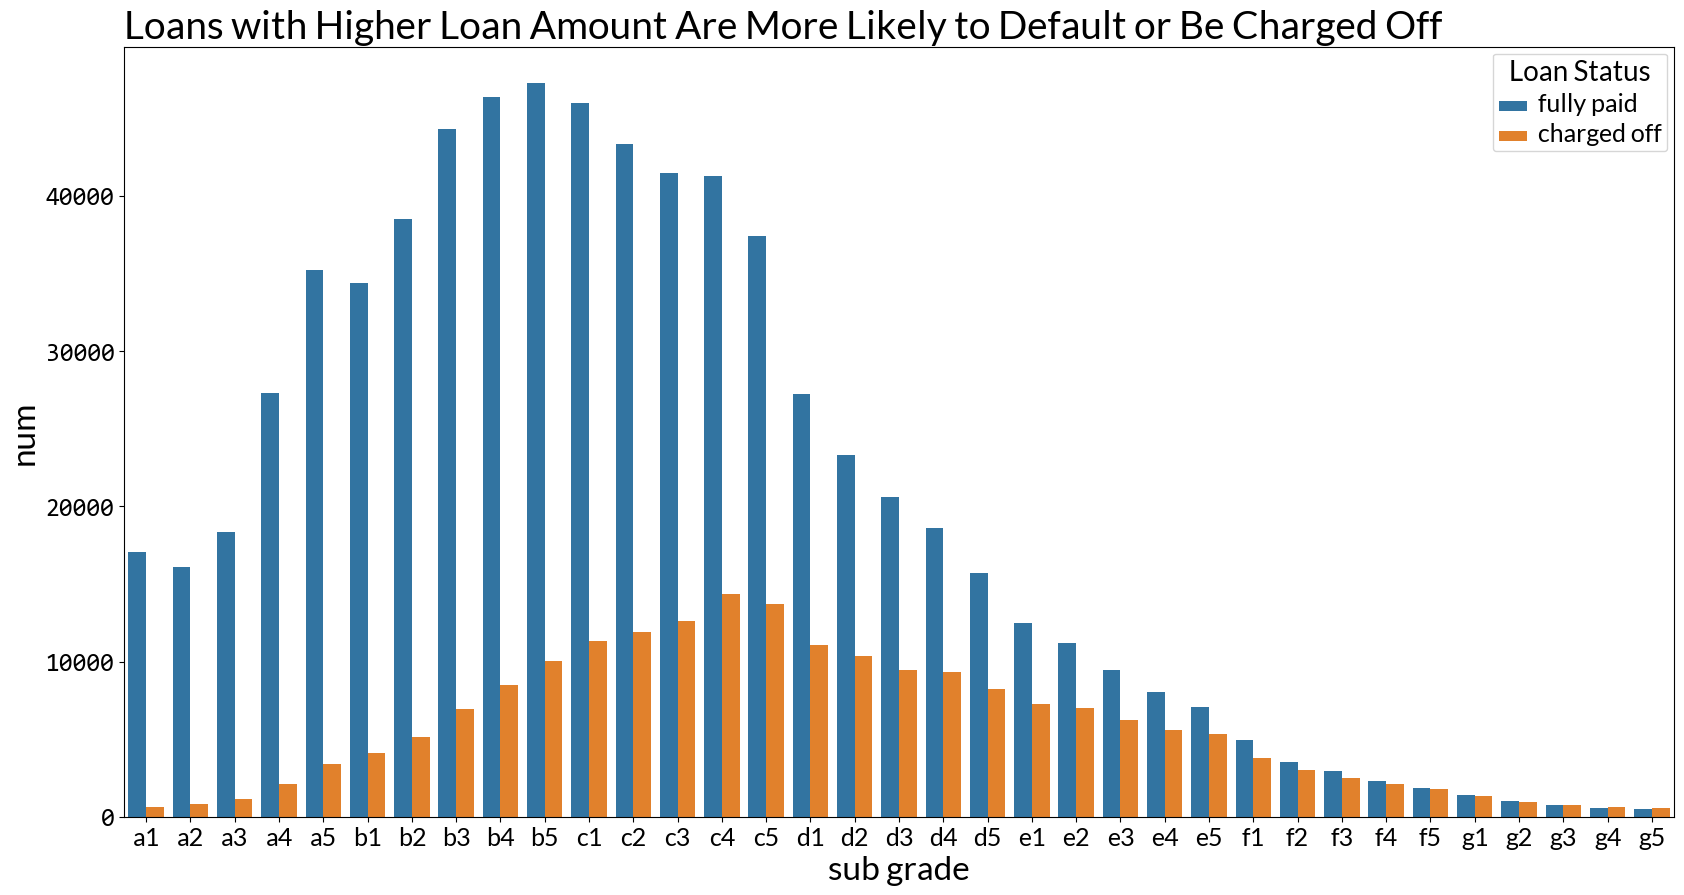

In [47]:
plt.figure(figsize=(20,10))

sub_g_order = sorted(df['sub_grade'].unique())

ax = sns.countplot(df,
                   x='sub_grade',
                   order=sub_g_order,
                   hue='loan_status')

ax.set_title('Loans with Higher Loan Amount Are More Likely to Default or Be Charged Off', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('sub grade', fontname='Lato', fontsize=24)
ax.set_ylabel('num', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Lato', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)

ax.legend(title='Loan Status')
plt.setp(ax.get_legend().get_texts(), fontname='Lato', fontsize=18)
plt.setp(ax.get_legend().get_title(), fontname='Lato', fontsize=20)

plt.show()

In [28]:
df.drop('loan_status', axis=1, inplace=True)

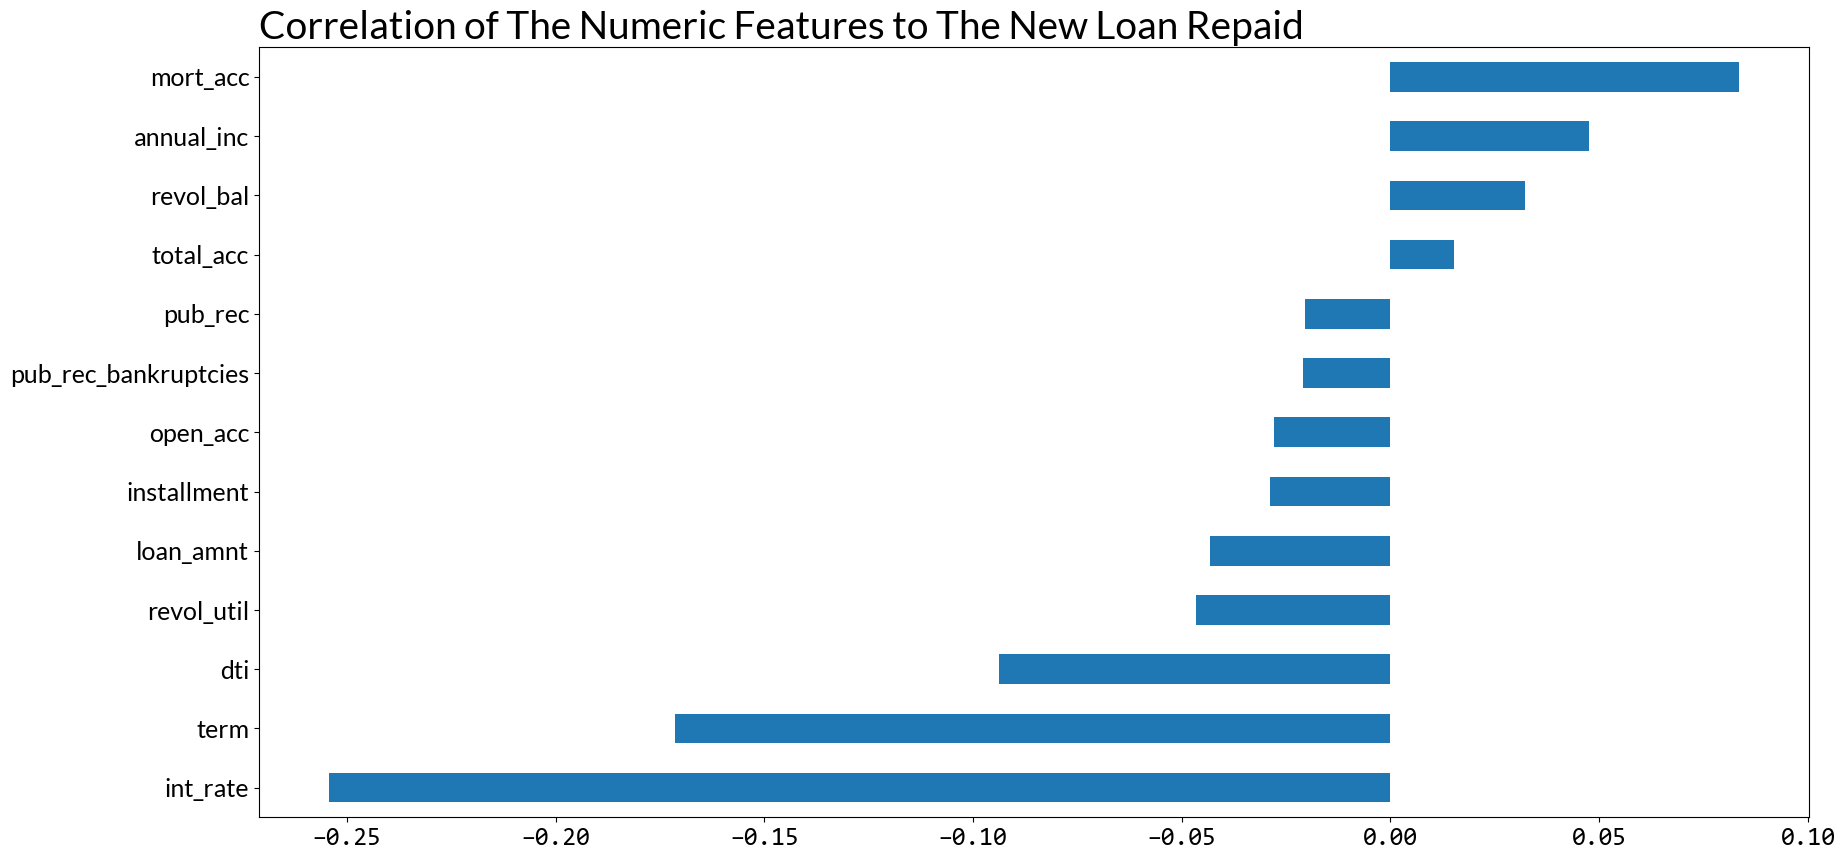

In [49]:
plt.figure(figsize=(20,10))

ax = df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='barh')

ax.set_title('Correlation of The Numeric Features to The New Loan Repaid', fontname='Lato', fontsize=28, loc='left')
plt.setp(ax.get_xticklabels(), fontname='Consolas', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Lato', fontsize=18)

plt.show()

## title
### The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [29]:
df['purpose'].value_counts()

debt_consolidation    542865
credit_card           189582
home_improvement       55996
other                  53262
major_purchase         17934
small_business         12940
medical                10128
car                     8094
moving                  7050
vacation                5910
house                   5448
wedding                 1363
renewable_energy         734
educational               96
Name: purpose, dtype: int64

In [30]:
df['title'].value_counts()

debt consolidation                          475451
credit card refinancing                     160566
home improvement                             49422
other                                        46791
major purchase                               15097
                                             ...  
fiscal cliff restructure                         1
bills and home project                           1
takeing control                                  1
credit card debt erase loan                      1
payng off higher rate at fixed rate/term         1
Name: title, Length: 34971, dtype: int64

In [31]:
df.drop('title', axis=1, inplace=True)

In [32]:
df.drop('zip_code', axis=1, inplace=True)

In [33]:
df.drop('addr_state', axis=1, inplace=True)

## earliest_cr_line

In [34]:
df['earliest_cr_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year

In [35]:
df['earliest_cr_year'].head()

100    2012
152    2009
215    1997
369    2007
402    2007
Name: earliest_cr_year, dtype: int64

In [36]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [37]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
dti                        21
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                607
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                28055
pub_rec_bankruptcies        1
loan_repaid                 0
earliest_cr_year            0
dtype: int64

In [38]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type'],
      dtype='object')

## convert dummies

In [39]:
dummies = pd.get_dummies(df[['sub_grade', 'home_ownership','verification_status', 'purpose','initial_list_status', 'application_type']],drop_first = True)

In [40]:
df = df.drop(['sub_grade', 'home_ownership','verification_status', 'purpose','initial_list_status', 'application_type'],axis=1)
df = pd.concat([df, dummies], axis=1)

In [41]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'earliest_cr_year',
       'sub_grade_a2', 'sub_grade_a3', 'sub_grade_a4', 'sub_grade_a5',
       'sub_grade_b1', 'sub_grade_b2', 'sub_grade_b3', 'sub_grade_b4',
       'sub_grade_b5', 'sub_grade_c1', 'sub_grade_c2', 'sub_grade_c3',
       'sub_grade_c4', 'sub_grade_c5', 'sub_grade_d1', 'sub_grade_d2',
       'sub_grade_d3', 'sub_grade_d4', 'sub_grade_d5', 'sub_grade_e1',
       'sub_grade_e2', 'sub_grade_e3', 'sub_grade_e4', 'sub_grade_e5',
       'sub_grade_f1', 'sub_grade_f2', 'sub_grade_f3', 'sub_grade_f4',
       'sub_grade_f5', 'sub_grade_g1', 'sub_grade_g2', 'sub_grade_g3',
       'sub_grade_g4', 'sub_grade_g5', 'home_ownership_other',
       'home_ownership_own', 'home_ownership_rent',
       'verification_status_verified', 'purpose_credit_card',
       'purpose_debt_consolidat

In [42]:
print("Mean of mort_acc column per total_acc")
df.groupby(['total_acc'])['mort_acc'].mean()

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.028188
4.0      0.073383
5.0      0.111829
6.0      0.169594
           ...   
156.0    1.000000
162.0    6.000000
169.0    2.000000
173.0    2.000000
176.0    2.000000
Name: mort_acc, Length: 137, dtype: float64

In [43]:
total_acc_avg = df.groupby(['total_acc'])['mort_acc'].mean()
total_acc_avg[2.0]

0.0

In [44]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round(2)
    else:
        return mort_acc

In [45]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [46]:
df.shape

(911402, 68)

In [47]:
df = df.dropna()

# **Splitting Data**

In [48]:
x = df.drop('loan_repaid', axis=1).values
x

array([[3.000e+04, 3.600e+01, 2.235e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [4.000e+04, 6.000e+01, 1.614e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [8.425e+03, 3.600e+01, 2.727e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.800e+04, 6.000e+01, 3.065e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.795e+04, 6.000e+01, 3.017e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.500e+04, 6.000e+01, 1.602e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [49]:
x = MinMaxScaler().fit_transform(x)
x

array([[0.74358974, 0.        , 0.6635514 , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.42172897, ..., 0.        , 1.        ,
        1.        ],
       [0.19038462, 0.        , 0.85514019, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.43589744, 1.        , 0.98676012, ..., 0.        , 1.        ,
        0.        ],
       [0.43461538, 1.        , 0.96806854, ..., 0.        , 0.        ,
        0.        ],
       [0.35897436, 1.        , 0.41705607, ..., 0.        , 1.        ,
        0.        ]])

In [50]:
y = df['loan_repaid'].values
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [52]:
x_train.shape

(728618, 67)

In [65]:
x_test.shape

(182155, 67)

# **Model Building**

## **Random Forest**

In [62]:
rfc = RandomForestClassifier(n_estimators=200).fit(x_train, y_train)

In [63]:
y_pred_rfc = rfc.predict(x_test)

In [64]:
accuracy_score(y_test, y_pred_rfc).round(2)

0.78

In [65]:
f1_score(y_test, y_pred_rfc).round(2)

0.87

In [66]:
cnf_rfc = confusion_matrix(y_test, y_pred_rfc)
cnf_rfc

array([[  3889,  36906],
       [  3244, 138116]], dtype=int64)

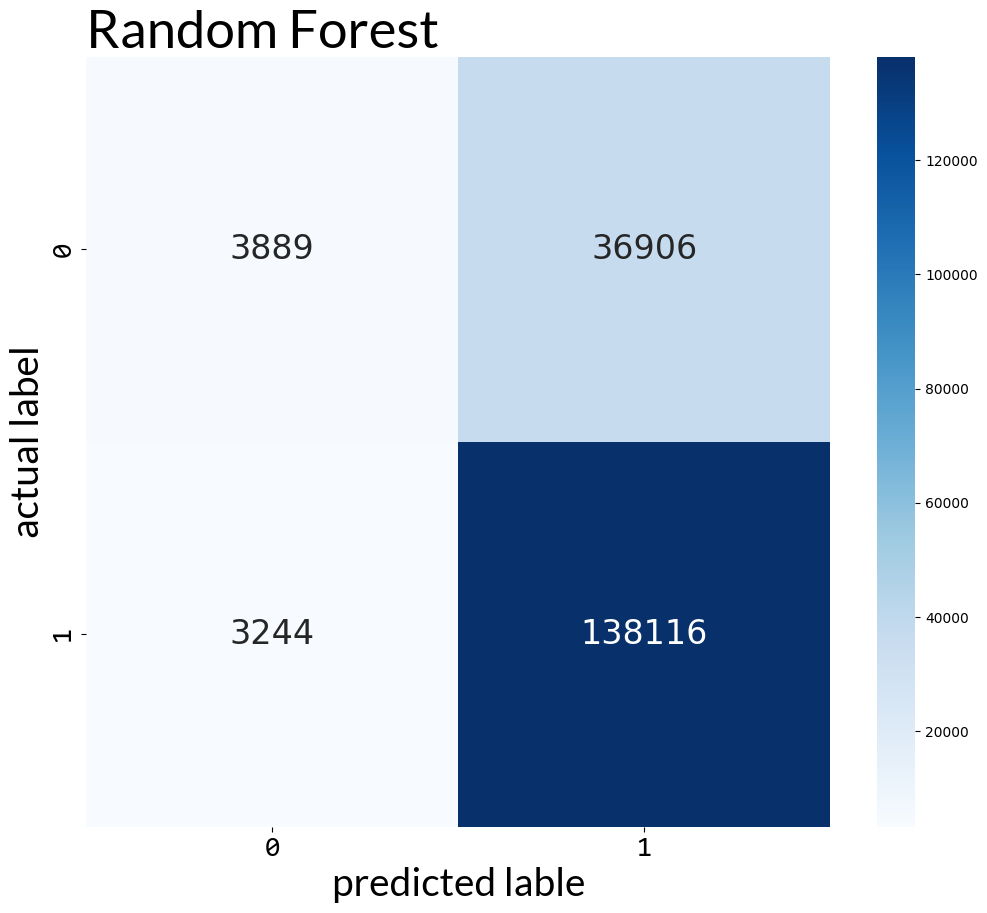

In [72]:
plt.figure(figsize=(12,10))

ax = sns.heatmap(pd.DataFrame(cnf_rfc),
                 annot=True,
                 cmap=plt.cm.Blues,
                 fmt='g',annot_kws={"fontsize":24})
ax.set_title('Random Forest', fontname='Lato', fontsize=38, loc='left')
ax.set_xlabel('predicted lable', fontname='Lato', fontsize=28)
ax.set_ylabel('actual label', fontname='Lato', fontsize=28)
plt.setp(ax.get_xticklabels(), fontname='Consolas', fontsize=20)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=20)

plt.savefig('cnf_rfc.png')
plt.show()

In [81]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.55      0.10      0.16     40795
           1       0.79      0.98      0.87    141360

    accuracy                           0.78    182155
   macro avg       0.67      0.54      0.52    182155
weighted avg       0.73      0.78      0.71    182155



<Figure size 1200x1000 with 0 Axes>

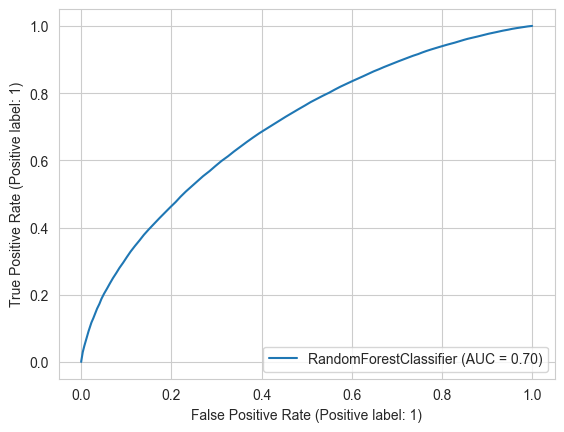

In [82]:
plt.figure(figsize=(12,10))
sns.set_style('whitegrid')

ax_rfc = plot_roc_curve(rfc, x_test, y_test)

plt.show()

## **XGB**

In [53]:
xgb = XGBClassifier(use_label_encoder=False).fit(x_train, y_train)

In [54]:
y_pred_xgb = xgb.predict(x_test)

In [55]:
accuracy_score(y_test, y_pred_xgb)

0.7807691251955752

In [56]:
f1_score(y_test, y_pred_xgb)

0.8735393404310569

In [84]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.56      0.11      0.18     40795
           1       0.79      0.98      0.87    141360

    accuracy                           0.78    182155
   macro avg       0.67      0.54      0.53    182155
weighted avg       0.74      0.78      0.72    182155



In [57]:
cnf_xgb = confusion_matrix(y_test, y_pred_xgb)
cnf_xgb

array([[  4297,  36498],
       [  3436, 137924]], dtype=int64)

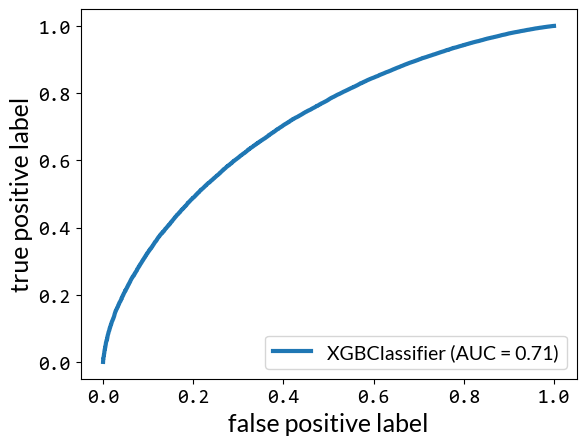

In [74]:
#sns.set_theme(style='white')

plot_roc_curve(xgb, x_test, y_test, linewidth=3)

plt.plot([0, 1], [0, 1], 'w', alpha=0)

plt.xlabel('false positive label', fontname='Lato', fontsize=18)
plt.ylabel('true positive label', fontname='Lato', fontsize=18)

plt.legend(prop={'family':'Lato', 'size':14}, loc='lower right')
plt.xticks(fontname='Consolas', fontsize=14)
plt.yticks(fontname='Consolas', fontsize=14)

plt.savefig('ax_xgb.png')
plt.show()

roc - reveiver operating characteristics

In [ ]:
ax.set_title('XGB', fontname='Lato', fontsize=28, loc='left')
ax.set_xlabel('predicted lable', fontname='Lato', fontsize=24)
ax.set_ylabel('actual label', fontname='Lato', fontsize=24)
plt.setp(ax.get_xticklabels(), fontname='Consolas', fontsize=18)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=18)

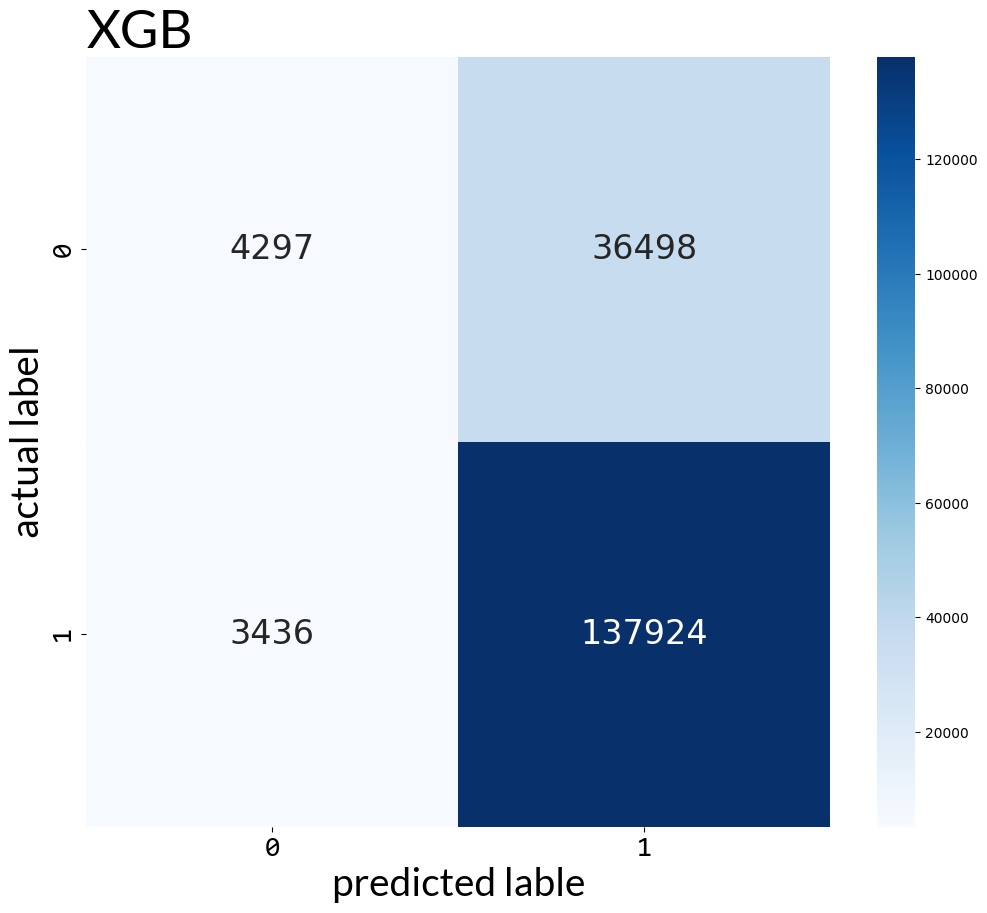

In [73]:
plt.figure(figsize=(12,10))

ax = sns.heatmap(pd.DataFrame(cnf_xgb),
                 annot=True,
                 cmap=plt.cm.Blues,
                 fmt='g',
                 annot_kws={"fontsize":24})

ax.set_title('XGB', fontname='Lato', fontsize=38, loc='left')
ax.set_xlabel('predicted lable', fontname='Lato', fontsize=28)
ax.set_ylabel('actual label', fontname='Lato', fontsize=28)
plt.setp(ax.get_xticklabels(), fontname='Consolas', fontsize=20)
plt.setp(ax.get_yticklabels(), fontname='Consolas', fontsize=20)

plt.savefig('cnf_xgb.png')
plt.show()

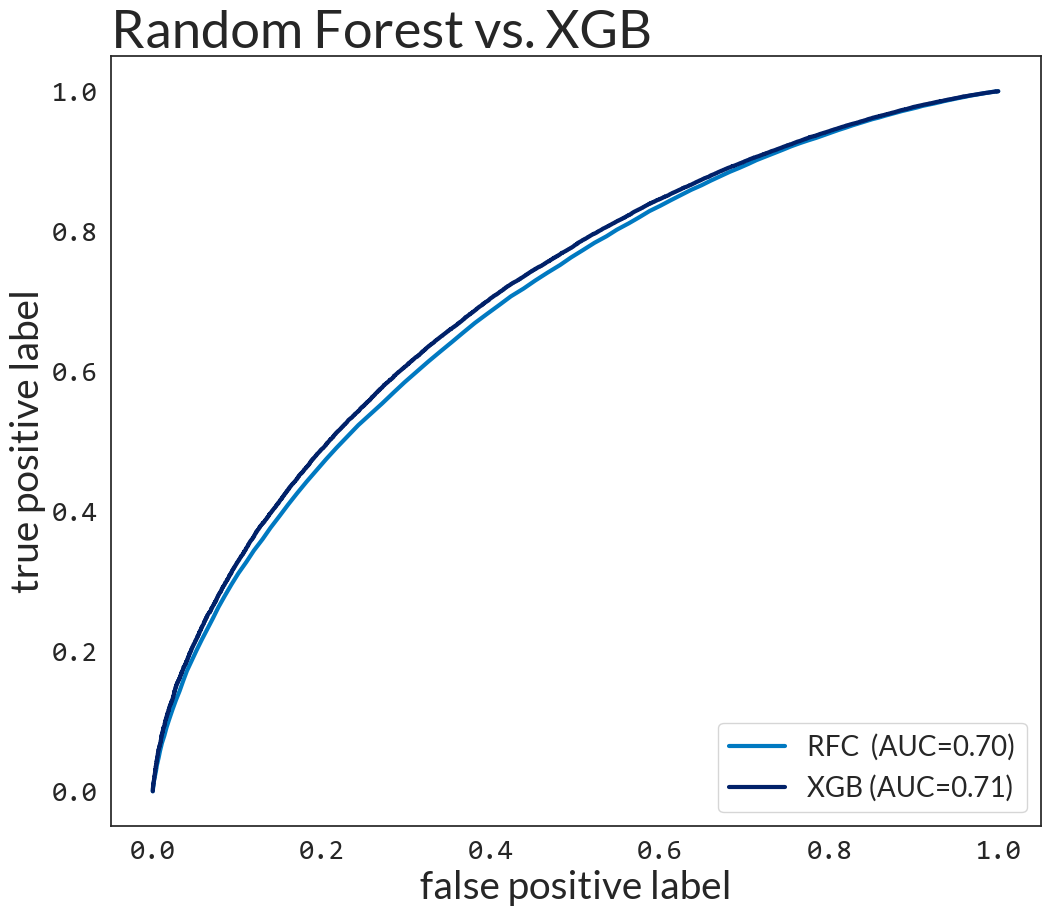

In [83]:
sns.set_theme(style='white')
plt.rcParams['figure.figsize'] = (12,10)

disp = plot_roc_curve(rfc, x_test, y_test, linewidth=3, color='#0079C1', label='RFC  (AUC=0.70)')
plot_roc_curve(xgb, x_test, y_test, linewidth=3, color='#012169', ax=disp.ax_, label='XGB (AUC=0.71)')

plt.plot([0, 1], [0, 1], 'w', alpha=0)

plt.title('Random Forest vs. XGB', fontname='Lato', fontsize=38, loc='left')
plt.xlabel('false positive label', fontname='Lato', fontsize=28)
plt.ylabel('true positive label', fontname='Lato', fontsize=28)

plt.legend(prop={'family':'Lato', 'size':20}, loc='lower right')
plt.xticks(fontname='Consolas', fontsize=20)
plt.yticks(fontname='Consolas', fontsize=20)

plt.savefig('ax_common.png')
plt.show()